# TP2 : Extraction d’Information et Traitement Automatique de Corpus

## Marouane BIDOUKHACH STIC

Ce notebook regroupe toutes les étapes du TP d'extraction d'information appliqué au sous-corpus CAMille pour une année spécifique.

### Étapes incluses:
- Extraction de mots-clés
- Génération d'un nuage de mots
- Identification d'entités nommées
- Analyse de sentiment simplifiée


---

### Étape 1 : Extraction de mots-clés pour une année spécifique avec Yake

In [2]:
import os
import yake

folder_path = '../data/txt/'  
selected_year = '1960'  

files = [f for f in os.listdir(folder_path) if selected_year in f]

texts = []
for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        texts.append(f.read())

kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

keywords = []
for text in texts:
    keywords_from_text = kw_extractor.extract_keywords(text)
    keywords.extend([kw for kw, score in keywords_from_text])

print(keywords[:10])


['Ecrire Agence Rossel', 'Agence Rossel', 'Rossel', 'l’Agence Rossel', 'Agence Rossel num', 'vltae Agence Rossel', 'Ecrire Agence', 'Bruxelles', 'Ecrire', 'Faire offre']


### Étape 2 : Génération d'un nuage de mots avec stopwords enrichis

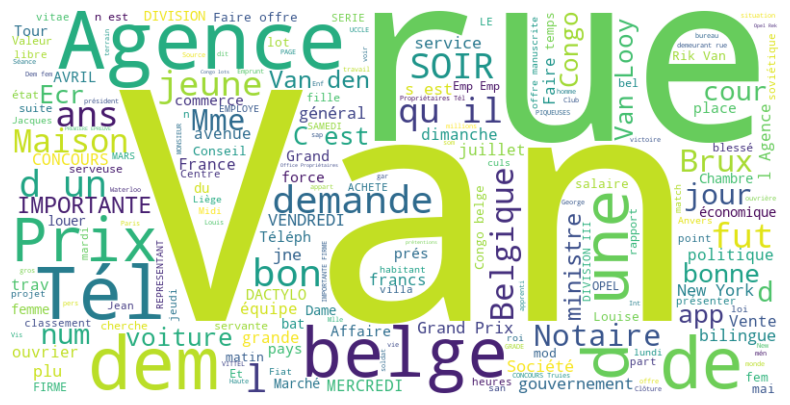

In [5]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = set(WordCloud().stopwords)
stopwords.update(['Ecrire Agence Rossel', 'Agence Rossel', 'Rossel', 'l’Agence Rossel', 'Agence Rossel num', 'vltae Agence Rossel', 'Ecrire Agence', 'Bruxelles', 'Ecrire', 'Faire offre']) 

wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(" ".join(keywords))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Étape 3 : Identification manuelle des entités nommées

In [7]:

persons = [kw for kw in keywords if "M." in kw or "Mme" in kw]  
organizations = [kw for kw in keywords if "Compagnie" in kw or "Société" in kw] 
places = [kw for kw in keywords if "ville" in kw or "pays" in kw] 

entities = {
    "Personnes": persons,
    "Organisations": organizations,
    "Lieux": places
}

print(entities)


{'Personnes': ['Mme', 'Mme', 'REM.', 'DEM.', 'bat Mme', 'Mme', 'bat Mme Haies', 'Schaetzen bat Mme', 'Mme Dethine bat', 'bat Mme Vanor', 'Vandepoorte bat Mme', 'Mme', 'Mme Van', 'Mme', 'Mme Van', 'Mme Van Hoof-Brams', 'Mme Van Vossel-Emmy', 'Mme Van Ackcr-Kasler', 'Mme Van Dromme-Docloedt', 'Mme Van Hoorick-Vandevenne', 'Mme Wagner,T enfant', 'Bruxelles Mme Euzet-Ruyblnne', 'Bruxelles Mme', 'Mme Delaet', 'Léopoldvitle Mme Knockaert', 'Mme veuve', 'Mme Lefeb', 'Mme Francis', 'Mme Gomes', 'Mme Burllon', 'Mme Cors Debulsson', 'Mme Ferrenn', 'Mme Flala', 'Mme Bauduln Portois', 'Mmes', 'DEM. fem', 'DEM. fem', 'Mme'], 'Organisations': ['Société', 'Société Belge', 'Société', 'Société importante', 'Société', 'Société libre', 'Société', 'Importante Société', 'Importante Société Commerciale'], 'Lieux': ['pays', 'ville', 'pays', 'pays', 'pays', 'D’un pays', 'pays', 'pays', 'Barbier de Séville', 'Elisabethville', 'pays', 'Léopoldville', 'Léopoldville', 'Léopoldville Léopoldville', 'pays', 'ville',

### Étape 4 : Analyse de sentiment des phrases sélectionnées

In [10]:
import os
import random
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import pandas as pd

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

folder_path = '../data/txt/'  
selected_year = '1960'  

files = [f for f in os.listdir(folder_path) if selected_year in f]

texts = []
for file in files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r', encoding='utf-8') as f:
        texts.extend(f.read().split('.'))  

# Sélection aléatoire de 10 phrases
random_phrases = random.sample([phrase.strip() for phrase in texts if len(phrase.strip()) > 10], 10)

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100 * abs(polarity):.0f}%"
    subjectivity_perc = f"{100 * subjectivity:.0f}%"
    
    if polarity > 0:
        polarity_str = f"{polarity_perc} positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc} negative"
    else:
        polarity_str = "neutral"
    
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc} subjective"
    else:
        subjectivity_str = "perfectly objective"
    
    return polarity_str, subjectivity_str

# Analyse de sentiment pour les 10 phrases
results = []
for phrase in random_phrases:
    polarity, subjectivity = get_sentiment(phrase)
    results.append({"Phrase": phrase, "Polarité": polarity, "Subjectivité": subjectivity})

df = pd.DataFrame(results)
print(df)


                                              Phrase      Polarité  \
0  pectifs dans le « Marathon de la Route » leur ...  50% positive   
1                                - N» 3 î 20 5/8 nom       neutral   
2       lo 27 Juillet venant d'Usumbura • Khartuum M       neutral   
3  Lorsqu» Cappi arriva eut le pont, le» yeux bou...  10% negative   
4                          Lumumba pourrait formuler       neutral   
5  L’initiative a été accueillie avec d’autant pl...  15% positive   
6  l>» 78130 LE BRIDEE Au service de l’amateur Pa...       neutral   
7  Cette question fait actuellement l’objet de né...       neutral   
8                                      102282A Bouch       neutral   
9  Et lorsque vous enlevez le réceptacle du rasoi...  15% positive   

          Subjectivité  
0       20% subjective  
1  perfectly objective  
2  perfectly objective  
3  perfectly objective  
4  perfectly objective  
5       25% subjective  
6  perfectly objective  
7  perfectly objective  
8  p